In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('auto_clean.csv')
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

# TRATAMENTO E MANIPULAÇÃO DE DADOS 

In [6]:
df['price'] = pd.to_numeric(df['price'].str.replace("?"," ").str.replace(',' ,'').str.replace('.', '').str.replace(" ", ''),downcast="float")

In [38]:
(df.isnull().sum() / len(df['price']))*100

symboling            0.0
normalized-losses    0.0
make                 0.0
aspiration           0.0
num-of-doors         0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
city-L/100km         0.0
horsepower-binned    0.0
diesel               0.0
gas                  0.0
dtype: float64

In [37]:
df = df.dropna()

In [32]:
df.stroke = df.stroke.fillna(0)

In [33]:
df.price = df.price.fillna(0)

In [ ]:
valor_mais_comu = df['engine-size'].mode()[0]

# Preenchendo os valores nulos com a moda
df['engine-size'].fillna(valor_mais_comu, inplace=True)

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [ ]:
df.describe()

In [10]:
# Outra forma de avaliarmos uma variável especifica e exibirmos a informação. 

print('Valor mínimo: ', df['wheel-base'].min())
print('Valor máximo: ', df['wheel-base'].max())
print('Valor da média:' , df['wheel-base'].mean())
print('Valor da médiana:', df['wheel-base'].median())
print('Valor da Moda:', df['wheel-base'].mode())
print('Valor da Variancia:', df['wheel-base'].var())

Valor mínimo:  86.6
Valor máximo:  120.9
Valor da média: 98.79701492537313
Valor da médiana: 97.0
Valor da Moda: 0    93.7
Name: wheel-base, dtype: float64
Valor da Variancia: 36.8007910447761


In [11]:

print('Valor mínimo: ', df['length'].min())
print('Valor máximo: ', df['length'].max())
print('Valor da média:' , df['length'].mean())
print('Valor da médiana:', df['length'].median())
print('Valor da Moda:', df['length'].mode())
print('Valor da Variancia:', df['length'].var())

Valor mínimo:  0.6780394041326285
Valor máximo:  1.0
Valor da média: 0.8371023307298204
Valor da médiana: 0.8322921672272945
Valor da Moda: 0    0.755887
Name: length, dtype: float64
Valor da Variancia: 0.00350615079674377


In [12]:
print('Valor mínimo: ', df['width'].min())
print('Valor máximo: ', df['width'].max())
print('Valor da média:' , df['width'].mean())
print('Valor da médiana:', df['width'].median())
print('Valor da Moda:', df['width'].mode())
print('Valor da Variancia:', df['width'].var())

Valor mínimo:  0.8374999999999999
Valor máximo:  1.0
Valor da média: 0.9151257600884466
Valor da médiana: 0.9097222222222222
Valor da Moda: 0    0.886111
Name: width, dtype: float64
Valor da Variancia: 0.0008518864972974645


In [13]:
print('Valor mínimo: ', df['height'].min())
print('Valor máximo: ', df['height'].max())
print('Valor da média:' , df['height'].mean())
print('Valor da médiana:', df['height'].median())
print('Valor da Moda:', df['height'].mode())
print('Valor da Variancia:', df['height'].var())

Valor mínimo:  47.8
Valor máximo:  59.8
Valor da média: 53.766666666666666
Valor da médiana: 54.1
Valor da Moda: 0    50.8
Name: height, dtype: float64
Valor da Variancia: 5.991833333333338


In [15]:
print('Valor mínimo: ', df['stroke'].min())
print('Valor máximo: ', df['stroke'].max())
print('Valor da média:' , df['stroke'].mean())
print('Valor da médiana:', df['stroke'].median())
print('Valor da Moda:', df['stroke'].mode())
print('Valor da Variancia:', df['stroke'].var())

Valor mínimo:  2.07
Valor máximo:  4.17
Valor da média: 3.256903553299492
Valor da médiana: 3.29
Valor da Moda: 0    3.4
Name: stroke, dtype: float64
Valor da Variancia: 0.10192454677302379


In [16]:
print('Valor mínimo: ', df['city-mpg'].min())
print('Valor máximo: ', df['city-mpg'].max())
print('Valor da média:' , df['city-mpg'].mean())
print('Valor da médiana:', df['city-mpg'].median())
print('Valor da Moda:', df['city-mpg'].mode())
print('Valor da Variancia:', df['city-mpg'].var())

Valor mínimo:  13
Valor máximo:  49
Valor da média: 25.17910447761194
Valor da médiana: 24.0
Valor da Moda: 0    31
Name: city-mpg, dtype: int64
Valor da Variancia: 41.25776119402983


In [17]:
print('Valor mínimo: ', df['highway-mpg'].min())
print('Valor máximo: ', df['highway-mpg'].max())
print('Valor da média:' , df['highway-mpg'].mean())
print('Valor da médiana:', df['highway-mpg'].median())
print('Valor da Moda:', df['highway-mpg'].mode())
print('Valor da Variancia:', df['highway-mpg'].var())

Valor mínimo:  16
Valor máximo:  54
Valor da média: 30.686567164179106
Valor da médiana: 30.0
Valor da Moda: 0    25
Name: highway-mpg, dtype: int64
Valor da Variancia: 46.44626865671642


In [18]:
# Outra forma de avaliarmos uma variável especifica e exibirmos a informação. 

print('Valor mínimo: ', df['price'].min())
print('Valor máximo: ', df['price'].max())
print('Valor da média:' , df['price'].mean())
print('Valor da médiana:', df['price'].median())
print('Valor da Moda:', df['price'].mode())
print('Valor da Variancia:', df['price'].var())

Valor mínimo:  5118.0
Valor máximo:  45400.0
Valor da média: 13207.129353233831
Valor da médiana: 10295.0
Valor da Moda: 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
Name: price, dtype: float64
Valor da Variancia: 63155863.443184026


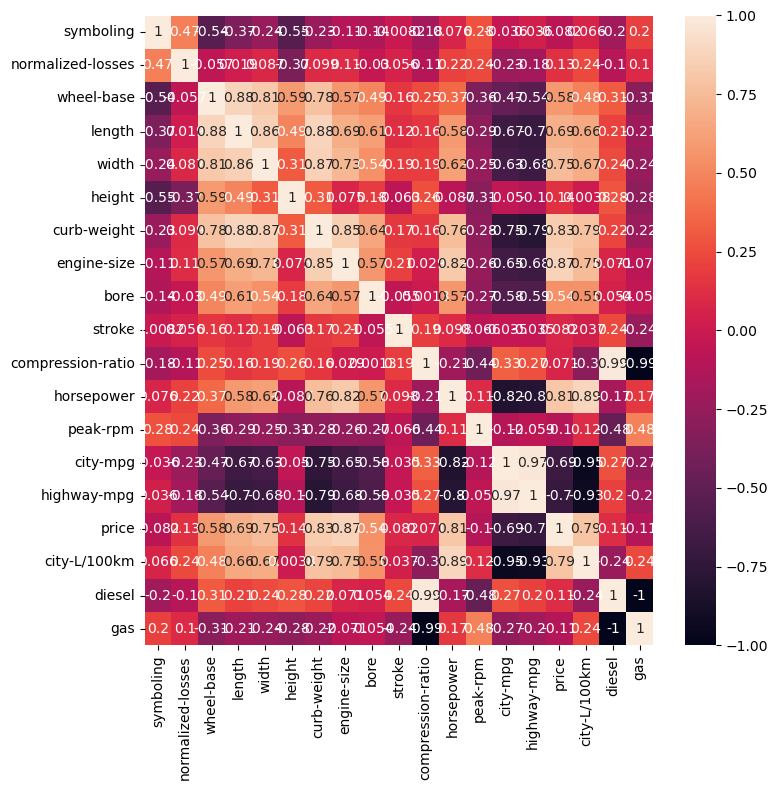

In [19]:

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df.corr(), annot=True)
plt.show()

### HISTOGRAMA

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized-losses'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>],
       [<Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peak-rpm'}>,
        <Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'city-L/100km'}>,
        <Axes: title={'center': 'diesel'}>,
        <Axes: title={'center': 'gas'}>, <Axes: >]], dtype=object)

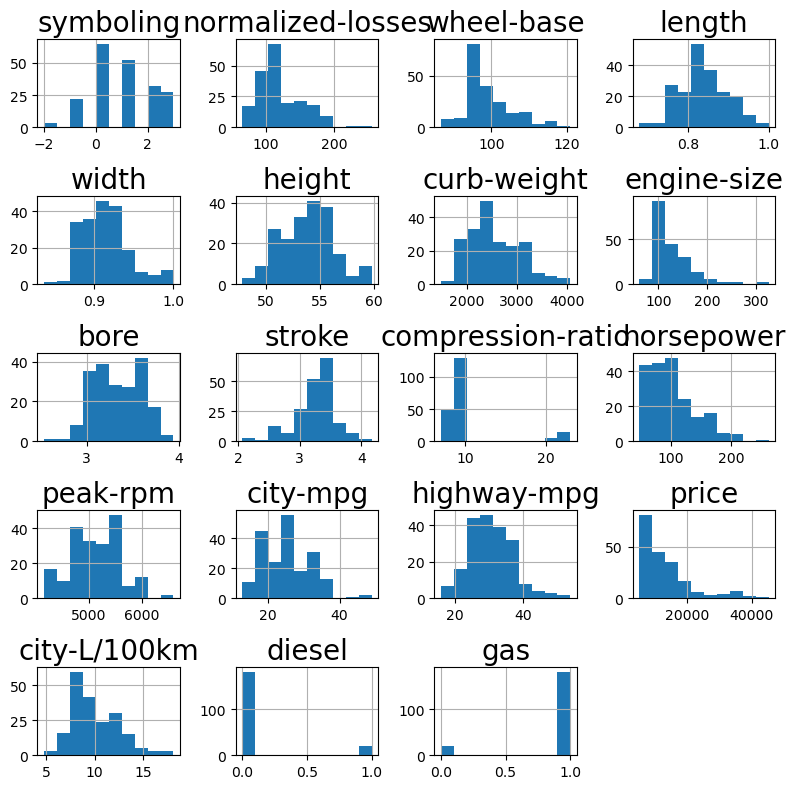

In [20]:
df.hist()

symboling : int64
normalized-losses : int64
wheel-base : float64
length : float64
width : float64


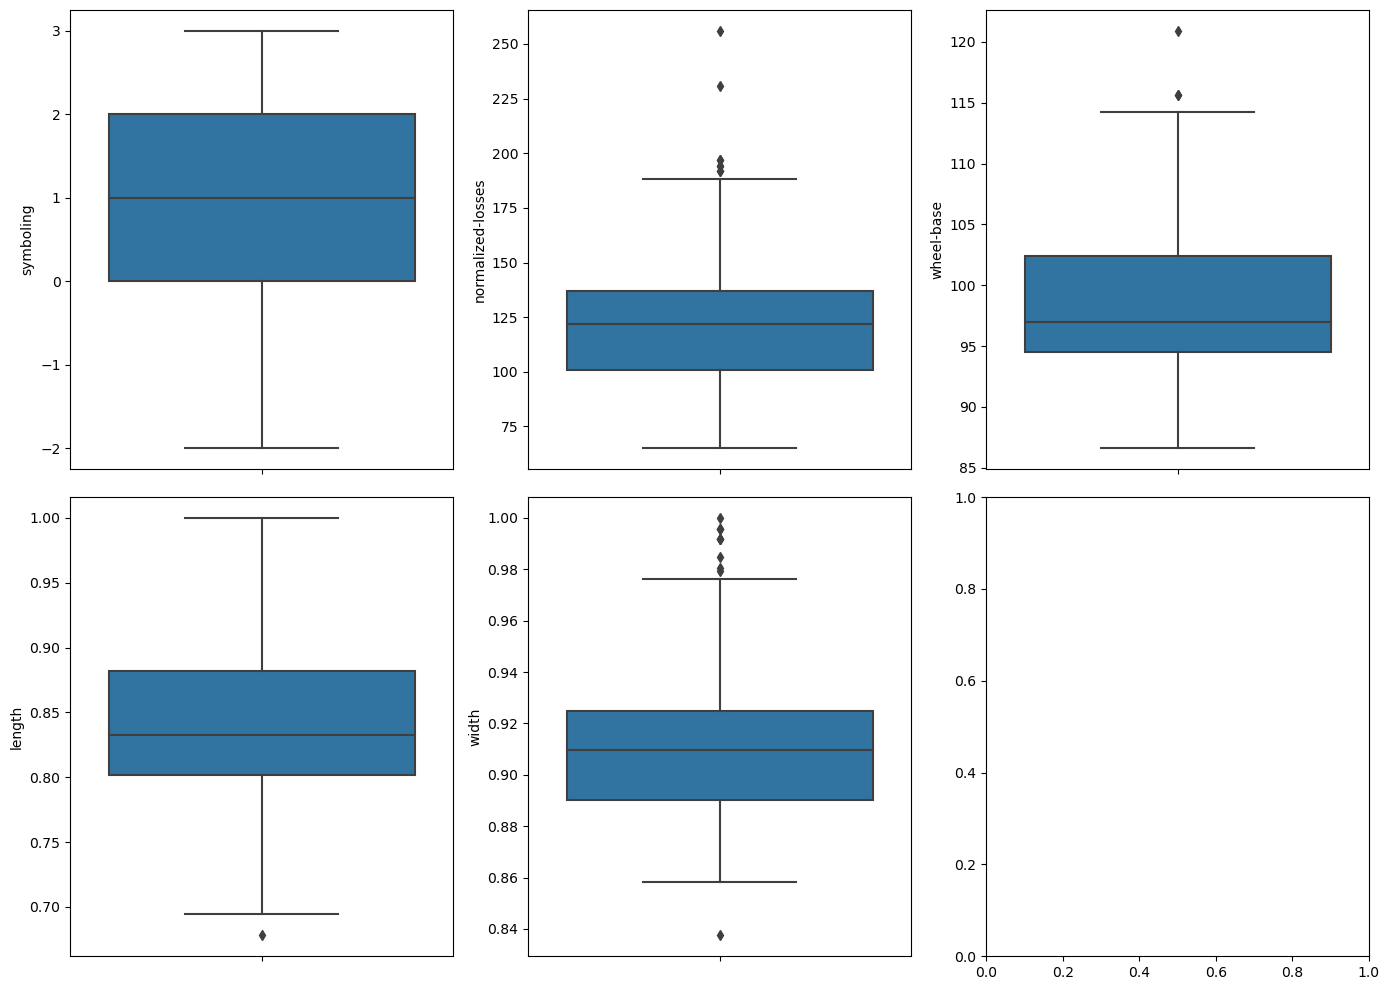

In [21]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df.columns[0:11].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

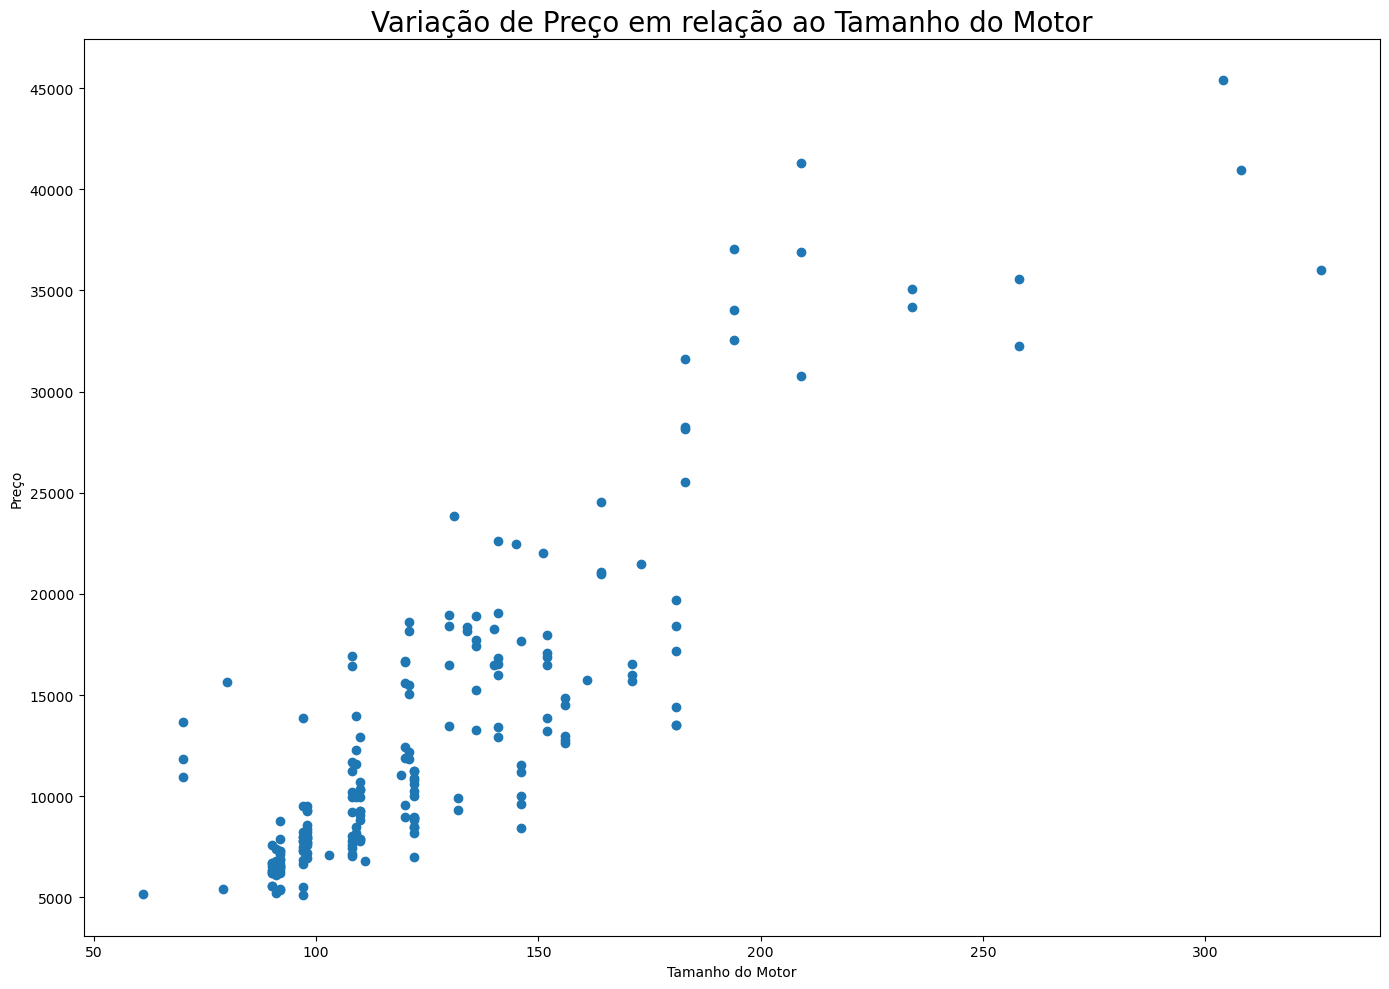

In [22]:
# Criar o gráfico de dispersão
plt.scatter(df['engine-size'], df['price'])
plt.xlabel('Tamanho do Motor')
plt.ylabel('Preço')
plt.title('Variação de Preço em relação ao Tamanho do Motor')
plt.show()